# Forum Group Discussion: Object Detection

Sabtu, 10 Mei 2025

## Anggota Tim Competition


* Muhammad Faqih Hakim
* Danu Tirta
* Nazwa Akilla Zahra



## Informasi Dataset

Dataset **Indonesia Traffic Sign Dataset** yang tersedia di platform Kaggle dan Roboflow Universe. Dataset ini berisi gambar-gambar rambu lalu lintas di Indonesia yang telah dianotasi untuk digunakan dalam deteksi objek.

Dataset ini terdiri dari lebih dari 15.000 gambar yang mencakup berbagai jenis rambu lalu lintas yang ditemukan di Indonesia. Setiap gambar telah dilabeli dengan anotasi yang menunjukkan lokasi rambu dalam gambar, yang memungkinkan model untuk dilatih dalam mendeteksi dan mengklasifikasikan berbagai rambu lalu lintas. Format anotasi yang digunakan sesuai dengan format YOLO, yang membuatnya kompatibel untuk digunakan dalam pelatihan model deteksi objek berbasis YOLO.

## Tahapan Analisis

Proses dilakukan berdasarkan tahapan dalam metode Cross-Industry Process for Data Mining (CRISP-DM), yang mencakup 6 langkah utama:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment



## Tahap 1: Business Understanding

Deteksi otomatis rambu lalu lintas sangat penting untuk mendukung keselamatan berkendara, khususnya pada sistem kendaraan otonom dan pemantauan lalu lintas. Salah satu tantangan utama dalam deteksi objek adalah memilih model yang tidak hanya akurat tetapi juga efisien dan ringan agar dapat dijalankan di perangkat yang terbatas sumber daya.

Proyek ini bertujuan untuk melatih dan membandingkan performa beberapa model YOLO (YOLOv8n, YOLOv9t, YOLOv10n, YOLOv11n) pada dataset rambu lalu lintas Indonesia, untuk melihat perbandingan dalam hal akurasi dan kecepatan deteksi.

### Instalasi Library yang Dibutuhkan

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

### Memanggil Library yang Dibutuhkan

In [ ]:
import os
import zipfile
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
import shutil
from PIL import Image
from google.colab import files
import io

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Tahap 2: Data Understanding

Tahap Data Understanding dilakukan untuk mengumpulkan dan menelaah data sebelum pemrosesan lebih lanjut. Data yang digunakan untuk melatih model harus benar-benar dipahami dan divalidasi agar model yang dibangun nantinya dapat memberikan hasil yang maksimal.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download adityabayhaqie/indonesia-traffic-sign-dataset-yolov11

Dataset URL: https://www.kaggle.com/datasets/adityabayhaqie/indonesia-traffic-sign-dataset-yolov11
License(s): CC-BY-SA-4.0


## Tahap 3: Data Preparation

Tahap Data Preparation adalah tahap membangun model deteksi objek. Data yang telah dikumpulkan harus diolah dan disiapkan agar dapat digunakan oleh model dengan benar. Di sini, kita mengekstrak file ZIP dan mempersiapkan dataset untuk proses pelatihan.

In [ ]:
extract_dir = 'dataset/'
os.makedirs(extract_dir, exist_ok=True)

In [ ]:
zip_file = '/content/indonesia-traffic-sign-dataset-yolov11.zip'
data_zip = zipfile.ZipFile(zip_file, 'r')
data_zip.extractall(extract_dir)
data_zip.close()

## Tahap 4: Modeling

Di tahap ini, kita membangun dan melatih model deteksi objek menggunakan berbagai versi YOLO (YOLOv8, YOLOv9, YOLOv10, dan YOLOv11). Pelatihan dilakukan untuk setiap model dengan parameter yang sama, seperti jumlah epoch, ukuran gambar, dan batch size.

### Latih Model YoloV8

In [ ]:
model1 = YOLO("yolov8n.pt")
model1.train(
    data='/content/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    save=True,
    patience=5
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 258MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, profi

100%|██████████| 755k/755k [00:00<00:00, 91.4MB/s]

Overriding model.yaml nc=80 with nc=40

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,018,648 parameters, 3,018,632 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 162MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1616.8±1005.7 MB/s, size: 59.8 KB)


train: Scanning /content/dataset/train/labels... 10714 images, 735 backgrounds, 0 corrupt: 100%|██████████| 10714/10714 [00:04<00:00, 2342.86it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.9 ms, read: 794.5±895.8 MB/s, size: 79.1 KB)


val: Scanning /content/dataset/valid/labels... 3085 images, 209 backgrounds, 0 corrupt: 100%|██████████| 3085/3085 [00:02<00:00, 1500.91it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.17G     0.5975      4.305      1.025          8        640: 100%|██████████| 670/670 [03:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.32it/s]


                   all       3085       2994      0.613      0.675      0.685      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.67G     0.5185      2.349     0.9469         10        640: 100%|██████████| 670/670 [03:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.50it/s]


                   all       3085       2994      0.839      0.856      0.894      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.69G     0.4871      1.613     0.9276          9        640: 100%|██████████| 670/670 [03:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.48it/s]


                   all       3085       2994      0.906      0.924      0.944      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.7G     0.4563      1.222     0.9103         10        640: 100%|██████████| 670/670 [03:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.47it/s]

                   all       3085       2994       0.88      0.944      0.951      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.72G     0.4279     0.9473     0.8992         11        640: 100%|██████████| 670/670 [03:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.60it/s]


                   all       3085       2994       0.92      0.968      0.961      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.74G     0.4055     0.7928     0.8843          8        640: 100%|██████████| 670/670 [03:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.63it/s]


                   all       3085       2994      0.926       0.97      0.959      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.75G     0.3839     0.6822     0.8759         10        640: 100%|██████████| 670/670 [03:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.66it/s]


                   all       3085       2994      0.938      0.975      0.962      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.77G     0.3657     0.6066     0.8696         12        640: 100%|██████████| 670/670 [03:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.63it/s]


                   all       3085       2994      0.942      0.985      0.966      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.79G     0.3481     0.5515     0.8647         10        640: 100%|██████████| 670/670 [02:59<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.60it/s]


                   all       3085       2994      0.945      0.988      0.967      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.8G     0.3344     0.5195     0.8559         10        640: 100%|██████████| 670/670 [03:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:26<00:00,  3.63it/s]

                   all       3085       2994      0.948      0.989      0.967       0.91



10 epochs completed in 0.585 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,013,448 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.31it/s]


                   all       3085       2994      0.948      0.989      0.967      0.909
Balai Pertolongan Pertama         67         67      0.991      0.985      0.986      0.972
      Banyak Anak-Anak         75         75      0.999          1      0.995      0.971
Banyak Tikungan Pertama Kanan         49         49       0.96      0.972      0.987       0.94
Banyak Tikungan Pertama Kiri         69         69      0.896      0.971      0.989      0.905
              Berhenti         76         76      0.991          1      0.995      0.982
  Dilarang Belok Kanan         83         83      0.927          1      0.995      0.913
   Dilarang Belok Kiri         44         47      0.959      0.979      0.992      0.732
     Dilarang Berhenti         78         79      0.987      0.983      0.994      0.969
        Dilarang Masuk         81         81      0.974          1      0.995      0.969
   Dilarang Mendahului         81         81      0.992          1      0.995      0.994
     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b1ab933c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.0

### Latih Model YoloV9

In [ ]:
model2 = YOLO("yolov9t.pt")
model2.train(
    data='/content/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    save=True,
    patience=5
)

100%|██████████| 4.74M/4.74M [00:00<00:00, 248MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9t.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

train: Scanning /content/dataset/train/labels.cache... 10714 images, 735 backgrounds, 0 corrupt: 100%|██████████| 10714/10714 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 929.1±640.2 MB/s, size: 79.1 KB)


val: Scanning /content/dataset/valid/labels.cache... 3085 images, 209 backgrounds, 0 corrupt: 100%|██████████| 3085/3085 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.84G     0.5861      4.343       1.02          8        640: 100%|██████████| 670/670 [04:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.45it/s]

                   all       3085       2994      0.604       0.68      0.689      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.31G     0.4996      2.277      0.941         10        640: 100%|██████████| 670/670 [04:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.37it/s]


                   all       3085       2994      0.817      0.878      0.884      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.31G     0.4732      1.606     0.9271          9        640: 100%|██████████| 670/670 [04:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.53it/s]


                   all       3085       2994      0.878      0.916      0.922      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.31G     0.4472      1.229      0.915         10        640: 100%|██████████| 670/670 [04:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.49it/s]


                   all       3085       2994       0.88      0.939      0.942      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.31G     0.4207     0.9663     0.9071         11        640: 100%|██████████| 670/670 [04:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.47it/s]


                   all       3085       2994        0.9      0.958      0.953      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.31G     0.4018     0.8042     0.8908          8        640: 100%|██████████| 670/670 [04:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.51it/s]


                   all       3085       2994      0.905      0.961      0.948      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.31G     0.3783     0.6895      0.882         10        640: 100%|██████████| 670/670 [04:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.56it/s]


                   all       3085       2994      0.934      0.952      0.958      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.31G     0.3606     0.6123     0.8779         12        640: 100%|██████████| 670/670 [04:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.40it/s]

                   all       3085       2994      0.939      0.974      0.962      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.31G      0.346      0.554     0.8723         10        640: 100%|██████████| 670/670 [04:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.48it/s]


                   all       3085       2994      0.937       0.98      0.964      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.31G     0.3341      0.519     0.8629         10        640: 100%|██████████| 670/670 [04:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.50it/s]


                   all       3085       2994      0.943      0.979      0.964      0.906

10 epochs completed in 0.767 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 4.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9t summary (fused): 197 layers, 1,978,584 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:30<00:00,  3.20it/s]


                   all       3085       2994      0.943       0.98      0.964      0.906
Balai Pertolongan Pertama         67         67      0.991      0.985      0.992      0.965
      Banyak Anak-Anak         75         75      0.974      0.999      0.995      0.978
Banyak Tikungan Pertama Kanan         49         49      0.876       0.98       0.98      0.934
Banyak Tikungan Pertama Kiri         69         69      0.913      0.942      0.986      0.894
              Berhenti         76         76      0.993          1      0.995       0.98
  Dilarang Belok Kanan         83         83      0.933          1      0.995       0.91
   Dilarang Belok Kiri         44         47      0.958      0.969      0.981      0.775
     Dilarang Berhenti         78         79      0.988      0.975      0.977      0.951
        Dilarang Masuk         81         81      0.981      0.988      0.994       0.96
   Dilarang Mendahului         81         81       0.99      0.975      0.994      0.993
     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b348de46d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.0

### Latih Model YoloV10

In [ ]:
model3 = YOLO("yolov10n.pt")
model3.train(
    data='/content/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    save=True,
    patience=5
)

100%|██████████| 5.59M/5.59M [00:00<00:00, 223MB/s]

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

 23        [16, 19, 22]  1    876928  ultralytics.nn.modules.head.v10Detect        [40, [64, 128, 256]]          
YOLOv10n summary: 223 layers, 2,722,640 parameters, 2,722,624 gradients, 8.5 GFLOPs

Transferred 493/595 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1472.7±624.9 MB/s, size: 59.8 KB)


train: Scanning /content/dataset/train/labels.cache... 10714 images, 735 backgrounds, 0 corrupt: 100%|██████████| 10714/10714 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 533.7±191.0 MB/s, size: 79.1 KB)


val: Scanning /content/dataset/valid/labels.cache... 3085 images, 209 backgrounds, 0 corrupt: 100%|██████████| 3085/3085 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.98G      1.201      15.82      2.026          8        640: 100%|██████████| 670/670 [03:51<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]


                   all       3085       2994      0.448      0.476       0.45      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.46G      1.104      10.54      1.945         10        640: 100%|██████████| 670/670 [03:42<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.45it/s]


                   all       3085       2994       0.51      0.622      0.619      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.47G       1.05      7.044      1.912          9        640: 100%|██████████| 670/670 [03:40<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.41it/s]


                   all       3085       2994      0.643      0.708      0.754      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.47G     0.9942      4.667      1.876         10        640: 100%|██████████| 670/670 [03:40<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.31it/s]


                   all       3085       2994      0.699      0.757      0.835      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.47G     0.9369      3.365      1.861         11        640: 100%|██████████| 670/670 [03:40<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.39it/s]


                   all       3085       2994      0.744      0.812      0.868       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.47G     0.8714      2.634      1.817          8        640: 100%|██████████| 670/670 [03:51<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.28it/s]


                   all       3085       2994      0.798      0.799      0.879      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.47G      0.818      2.201      1.787         10        640: 100%|██████████| 670/670 [03:39<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.31it/s]

                   all       3085       2994      0.801      0.832       0.89      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.48G      0.766       1.91      1.772         12        640: 100%|██████████| 670/670 [03:40<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.24it/s]

                   all       3085       2994      0.823      0.858      0.912      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.48G     0.7258      1.715      1.756         10        640: 100%|██████████| 670/670 [03:40<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.34it/s]


                   all       3085       2994      0.835      0.861      0.913      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.48G      0.685       1.59      1.732         10        640: 100%|██████████| 670/670 [03:44<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.47it/s]

                   all       3085       2994      0.831      0.873      0.919      0.869



10 epochs completed in 0.703 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.8MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,272,968 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.29it/s]


                   all       3085       2994      0.833      0.872      0.919      0.869
Balai Pertolongan Pertama         67         67      0.952      0.883      0.974      0.961
      Banyak Anak-Anak         75         75      0.882      0.973      0.983      0.964
Banyak Tikungan Pertama Kanan         49         49      0.917      0.907      0.947        0.9
Banyak Tikungan Pertama Kiri         69         69      0.868       0.87      0.953      0.885
              Berhenti         76         76      0.691          1      0.948      0.935
  Dilarang Belok Kanan         83         83      0.904       0.88      0.941      0.862
   Dilarang Belok Kiri         44         47      0.831      0.894      0.924      0.746
     Dilarang Berhenti         78         79      0.896      0.861      0.944      0.925
        Dilarang Masuk         81         81      0.787      0.951      0.956      0.922
   Dilarang Mendahului         81         81      0.838      0.951      0.965      0.961
     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b0f8e2e4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.0

### Latih Model YoloV11

In [ ]:
model4 = YOLO("/content/yolo11n.pt")
model4.train(
    data='/content/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    save=True,
    patience=5
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=T

train: Scanning /content/dataset/train/labels.cache... 10714 images, 735 backgrounds, 0 corrupt: 100%|██████████| 10714/10714 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 411.4±322.7 MB/s, size: 79.1 KB)


val: Scanning /content/dataset/valid/labels.cache... 3085 images, 209 backgrounds, 0 corrupt: 100%|██████████| 3085/3085 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000227, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.5G     0.6055      4.582      1.024          8        640: 100%|██████████| 670/670 [03:31<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.51it/s]


                   all       3085       2994      0.594      0.592      0.622      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.91G     0.5406      2.523     0.9683         10        640: 100%|██████████| 670/670 [03:23<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.32it/s]


                   all       3085       2994      0.837      0.861      0.879      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.92G     0.4989      1.674     0.9466          9        640: 100%|██████████| 670/670 [03:21<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.50it/s]


                   all       3085       2994       0.91      0.925      0.932      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.92G     0.4638      1.259     0.9233         10        640: 100%|██████████| 670/670 [03:35<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.38it/s]

                   all       3085       2994      0.925      0.918      0.946      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.92G     0.4394     0.9807     0.9139         11        640: 100%|██████████| 670/670 [03:42<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.46it/s]


                   all       3085       2994      0.935      0.961      0.959      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.92G     0.4108     0.8074     0.8956          8        640: 100%|██████████| 670/670 [03:42<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.32it/s]


                   all       3085       2994      0.935      0.956      0.959       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.92G     0.3871     0.6989     0.8857         10        640: 100%|██████████| 670/670 [03:26<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.29it/s]

                   all       3085       2994       0.94      0.978      0.963      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.92G     0.3663     0.6211     0.8745         12        640: 100%|██████████| 670/670 [03:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:29<00:00,  3.34it/s]


                   all       3085       2994      0.949      0.977      0.973      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.92G     0.3457     0.5644     0.8693         10        640: 100%|██████████| 670/670 [03:20<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:27<00:00,  3.51it/s]


                   all       3085       2994      0.945      0.986      0.966      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.92G     0.3306     0.5291     0.8579         10        640: 100%|██████████| 670/670 [03:25<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:28<00:00,  3.46it/s]


                   all       3085       2994      0.951      0.984      0.967      0.912

10 epochs completed in 0.662 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]


                   all       3085       2994      0.951      0.984      0.967      0.912
Balai Pertolongan Pertama         67         67      0.993          1      0.995      0.967
      Banyak Anak-Anak         75         75      0.981          1      0.995      0.976
Banyak Tikungan Pertama Kanan         49         49      0.929          1      0.993      0.937
Banyak Tikungan Pertama Kiri         69         69      0.963      0.971      0.993      0.913
              Berhenti         76         76      0.978          1      0.995      0.973
  Dilarang Belok Kanan         83         83      0.967          1      0.995       0.93
   Dilarang Belok Kiri         44         47      0.978      0.979      0.985      0.811
     Dilarang Berhenti         78         79          1      0.951      0.977       0.95
        Dilarang Masuk         81         81      0.963          1      0.995      0.953
   Dilarang Mendahului         81         81      0.992          1      0.995      0.989
     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b0ba239790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.0

## Tahap 5: Evaluation

Setelah model dilatih, tahap selanjutnya adalah evaluasi untuk menilai kinerja model terhadap data uji. Pada tahap ini kami membandingkan beberapa metrik performa seperti class_loss, box_loss, precision, recall, F1 score, dan mAP50 antara model-model yang telah dilatih.

In [ ]:
paths = [
    ('/content/runs/detect/train/results.csv', 'YOLOv8n'),
    ('/content/runs/detect/train2/results.csv', 'YOLOv9t'),
    ('/content/runs/detect/train3/results.csv', 'YOLOv10n'),
    ('/content/runs/detect/train4/results.csv', 'YOLOv11n'),
]

class_losses = []
box_losses = []
model_names = []

for path, model_name in paths:
    df_results = pd.read_csv(path)
    class_losses.append(df_results['train/cls_loss'])
    box_losses.append(df_results['train/box_loss'])
    model_names.append(model_name)

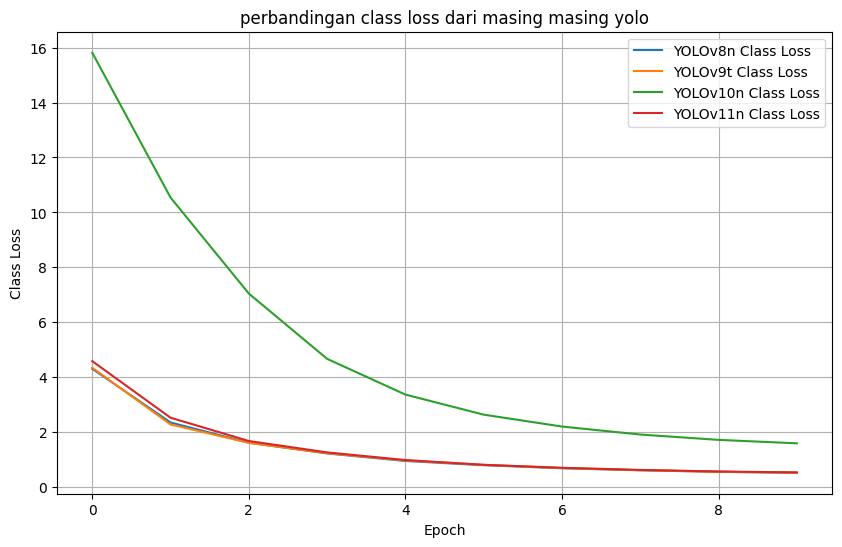

In [ ]:
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(model_names):
    plt.plot(df_results.index, class_losses[i], label=f'{model_name} Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('perbandingan class loss dari masing masing yolo')
plt.legend()
plt.grid(True)
plt.show()

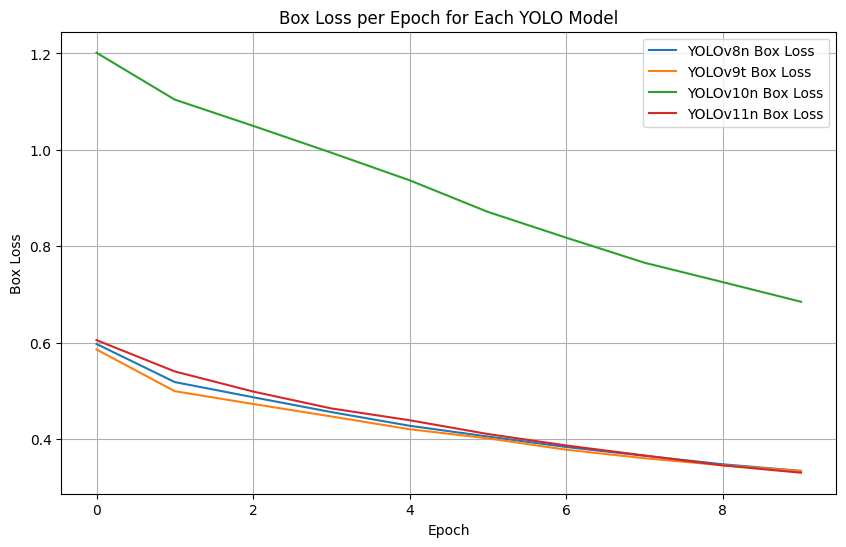

In [ ]:
plt.figure(figsize=(10, 6))
for i, model_name in enumerate(model_names):
    plt.plot(df_results.index, box_losses[i], label=f'{model_name} Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss per Epoch for Each YOLO Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
metrics1 = model1.val(split='test')
metrics2 = model2.val(split='test')
metrics3 = model3.val(split='test')
metrics4 = model4.val(split='test')

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,013,448 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.4±15.2 MB/s, size: 73.6 KB)


val: Scanning /content/dataset/test/labels... 1552 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1552/1552 [00:02<00:00, 518.08it/s]


val: New cache created: /content/dataset/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:17<00:00,  5.40it/s]


                   all       1552       1520      0.945      0.987      0.968       0.91
Balai Pertolongan Pertama         41         41      0.982      0.976      0.978      0.972
      Banyak Anak-Anak         36         36      0.984          1      0.995      0.979
Banyak Tikungan Pertama Kanan         24         24      0.957      0.958      0.982      0.965
Banyak Tikungan Pertama Kiri         35         35      0.924      0.971      0.993      0.909
              Berhenti         38         38      0.979          1      0.995      0.988
  Dilarang Belok Kanan         39         39      0.958          1      0.991      0.901
   Dilarang Belok Kiri         22         25      0.966          1      0.995      0.794
     Dilarang Berhenti         44         44          1      0.995      0.995      0.943
        Dilarang Masuk         41         41      0.955          1      0.995      0.963
   Dilarang Mendahului         27         27      0.978          1      0.995      0.987
     

val: Scanning /content/dataset/test/labels.cache... 1552 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1552/1552 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:20<00:00,  4.70it/s]


                   all       1552       1520      0.939      0.989      0.968      0.911
Balai Pertolongan Pertama         41         41      0.986      0.976      0.989      0.975
      Banyak Anak-Anak         36         36      0.977      0.972      0.994      0.987
Banyak Tikungan Pertama Kanan         24         24      0.892          1      0.983      0.938
Banyak Tikungan Pertama Kiri         35         35       0.98      0.971      0.991      0.916
              Berhenti         38         38      0.984          1      0.995      0.991
  Dilarang Belok Kanan         39         39      0.963          1      0.995      0.919
   Dilarang Belok Kiri         22         25      0.974          1      0.995      0.787
     Dilarang Berhenti         44         44          1      0.997      0.995      0.946
        Dilarang Masuk         41         41      0.963          1      0.995      0.972
   Dilarang Mendahului         27         27      0.972          1      0.995      0.987
     

val: Scanning /content/dataset/test/labels.cache... 1552 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1552/1552 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:18<00:00,  5.35it/s]


                   all       1552       1520      0.818      0.884      0.923      0.871
Balai Pertolongan Pertama         41         41      0.781       0.96      0.963       0.96
      Banyak Anak-Anak         36         36      0.741      0.875      0.928      0.918
Banyak Tikungan Pertama Kanan         24         24      0.889      0.833      0.924      0.887
Banyak Tikungan Pertama Kiri         35         35      0.877      0.943      0.975      0.915
              Berhenti         38         38      0.795      0.947      0.943      0.939
  Dilarang Belok Kanan         39         39      0.884      0.872      0.948      0.863
   Dilarang Belok Kiri         22         25      0.813      0.872      0.925      0.787
     Dilarang Berhenti         44         44      0.902      0.977      0.973      0.904
        Dilarang Masuk         41         41      0.745      0.902      0.929      0.893
   Dilarang Mendahului         27         27      0.831          1       0.99      0.984
     

val: Scanning /content/dataset/test/labels.cache... 1552 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1552/1552 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:18<00:00,  5.35it/s]


                   all       1552       1520      0.952      0.989      0.968      0.914
Balai Pertolongan Pertama         41         41      0.989          1      0.995      0.983
      Banyak Anak-Anak         36         36      0.991          1      0.995      0.987
Banyak Tikungan Pertama Kanan         24         24       0.94          1      0.992      0.964
Banyak Tikungan Pertama Kiri         35         35      0.985      0.971      0.993      0.934
              Berhenti         38         38      0.987          1      0.995      0.987
  Dilarang Belok Kanan         39         39      0.977          1      0.995      0.905
   Dilarang Belok Kiri         22         25      0.982          1      0.995      0.832
     Dilarang Berhenti         44         44      0.994          1      0.995      0.946
        Dilarang Masuk         41         41      0.987          1      0.995       0.96
   Dilarang Mendahului         27         27      0.981          1      0.995      0.988
     

In [ ]:
def metricsF1(metrics):
    precision = metrics.results_dict.get('metrics/precision(B)', 0)
    recall = metrics.results_dict.get('metrics/recall(B)', 0)
    if precision + recall != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0

    return f1_score

In [ ]:
df = pd.DataFrame({
    'Model': ['YOLOv8n', 'YOLOv9t', 'YOLOv10n', 'YOLOv11n'],
    'Precision': [
        round(metrics1.results_dict["metrics/precision(B)"], 4),
        round(metrics2.results_dict["metrics/precision(B)"], 4),
        round(metrics3.results_dict["metrics/precision(B)"], 4),
        round(metrics4.results_dict["metrics/precision(B)"], 4)
    ],
    'Recall': [
        round(metrics1.results_dict["metrics/recall(B)"], 4),
        round(metrics2.results_dict["metrics/recall(B)"], 4),
        round(metrics3.results_dict["metrics/recall(B)"], 4),
        round(metrics4.results_dict["metrics/recall(B)"], 4)
    ],
    'F1 Score': [
        metricsF1(metrics1),
        metricsF1(metrics2),
        metricsF1(metrics3),
        metricsF1(metrics4)
    ],
    'mAP50': [
        round(metrics1.results_dict["metrics/mAP50(B)"], 4),
        round(metrics2.results_dict["metrics/mAP50(B)"], 4),
        round(metrics3.results_dict["metrics/mAP50(B)"], 4),
        round(metrics4.results_dict["metrics/mAP50(B)"], 4)
    ]
})

df = df.round(4)
df


,Model,Precision,Recall,F1 Score,mAP50
0,YOLOv8n,0.9446,0.9874,0.9655,0.9678
1,YOLOv9t,0.9392,0.9890,0.9635,0.9677
2,YOLOv10n,0.8184,0.8844,0.8501,0.9231
3,YOLOv11n,0.9519,0.9892,0.9702,0.9677


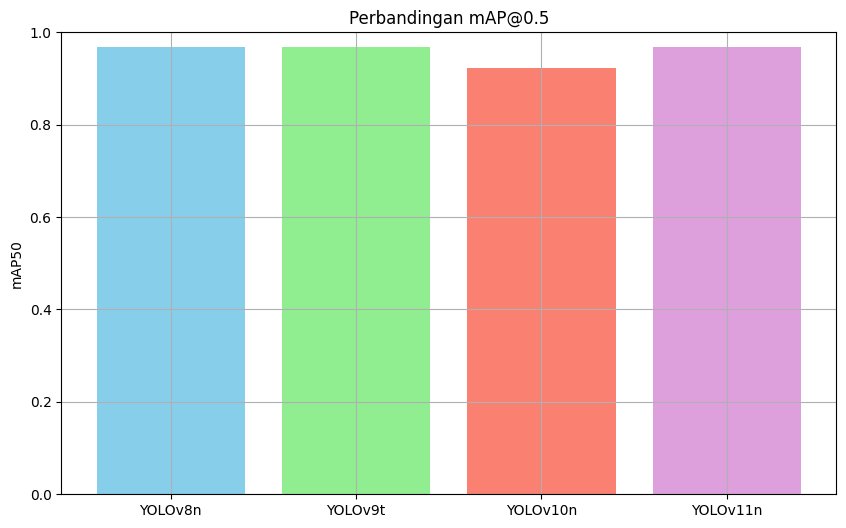

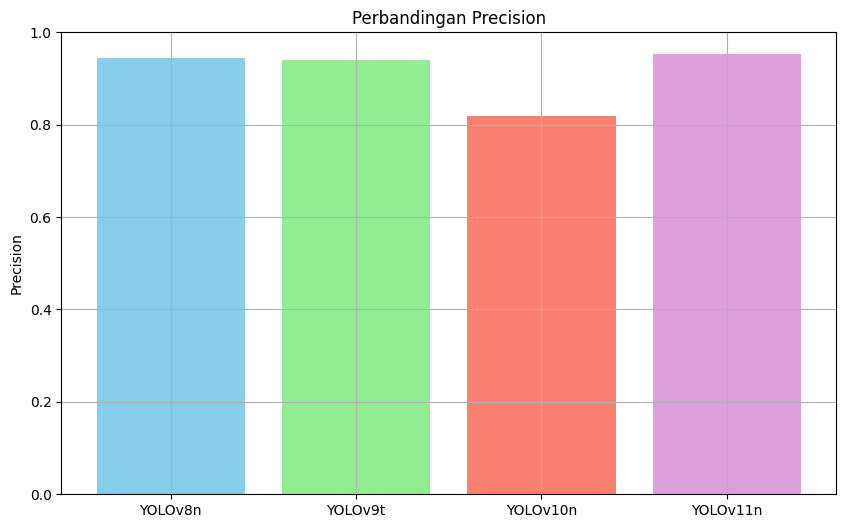

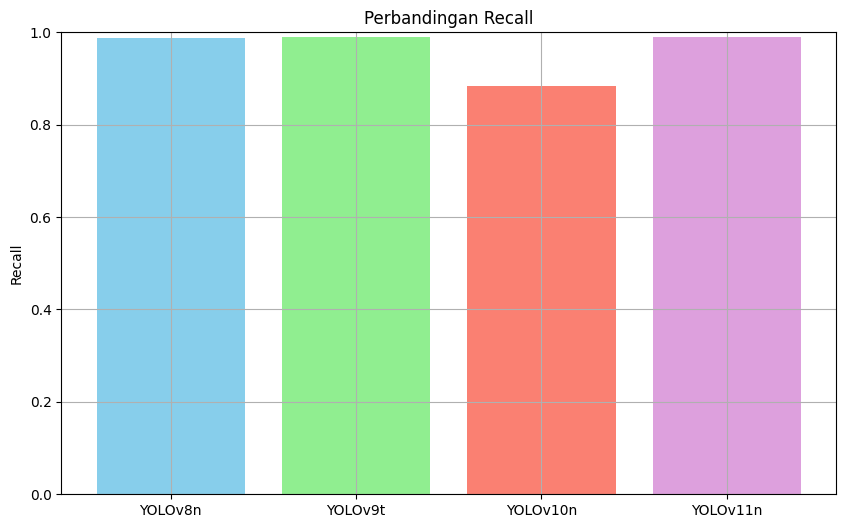

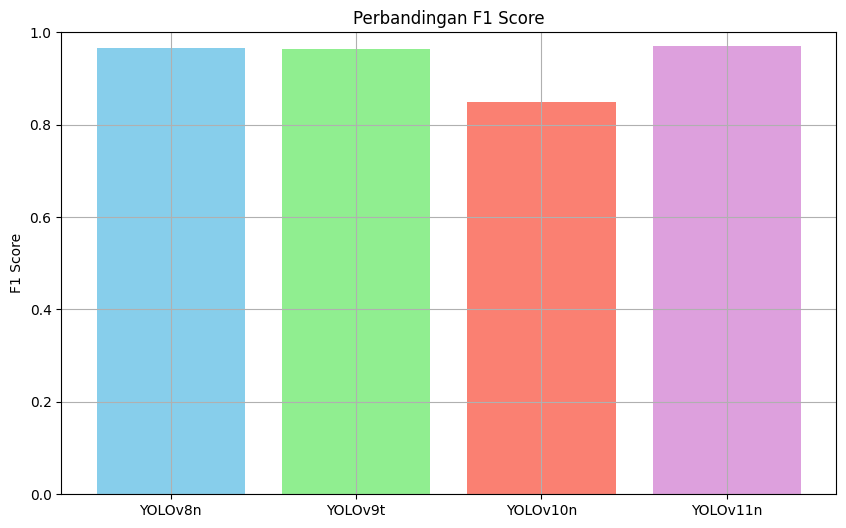

In [ ]:
plotMatrics = [
    ("mAP50", "Perbandingan mAP@0.5"),
    ("Precision", "Perbandingan Precision"),
    ("Recall", "Perbandingan Recall"),
    ("F1 Score", "Perbandingan F1 Score")
]

for metric, title in plotMatrics:
    plt.figure(figsize=(10, 6))
    plt.bar(df['Model'], df[metric], color = ['skyblue', 'lightgreen', 'salmon', 'plum'])
    plt.title(title)
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

In [ ]:
def predict_BoundingBox(img_path, results):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        cls = int(box.cls[0].item())

        label = f"{model3.names[cls]}: {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return img

In [ ]:
prediksi = model4.predict(source='/content/dataset/test/images', save=False)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1552 /content/dataset/test/images/1-10-_jpg.rf.f2eeb37e204596bade963f9312685bad.jpg: 640x640 1 Kecepatan Maks. 40 km, 262.5ms
image 2/1552 /content/dataset/test/images/1-105-_jpg.rf.2b6d33aef08b620216930198bcab0040.jpg: 640x640 1 Kecepatan Maks. 40 km, 9.6ms
image 3/1552 /content/dataset/test/images/1-106-_jpg.rf.95766d4e4f66a0d9f40a001b9b2a9c69.jpg: 640x640 1 Kecepatan Maks. 40 km, 9.2ms
image 4/1552 /content/dataset/test/images/1-110-_jpg.rf.

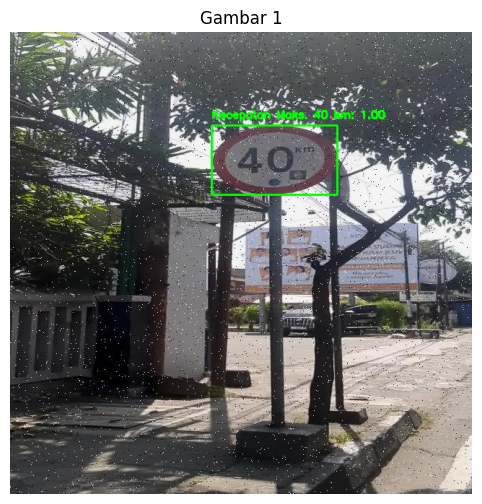

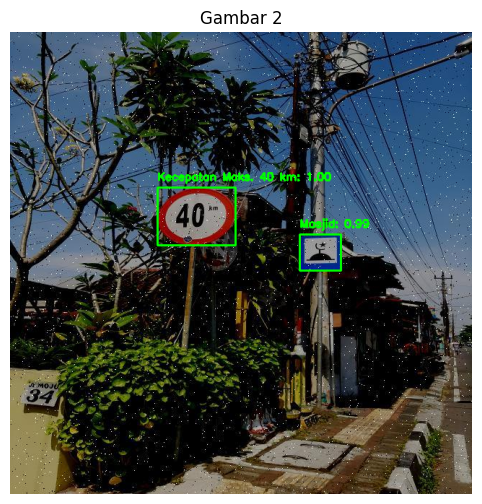

In [ ]:
for i, result in enumerate(prediksi[10:12]):
    img_path = result.path
    img_with_boxes = predict_BoundingBox(img_path, result)

    plt.figure(figsize=(8, 6))
    plt.imshow(img_with_boxes)
    plt.axis("off")
    plt.title(f"Gambar {i+1}")
    plt.show()

Saving jangan-berkendara-ngebut-0657.png to jangan-berkendara-ngebut-0657 (1).png

image 1/1 /content/temp_input.jpg: 640x640 1 Kecepatan Maks. 40 km, 34.5ms
Speed: 2.9ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


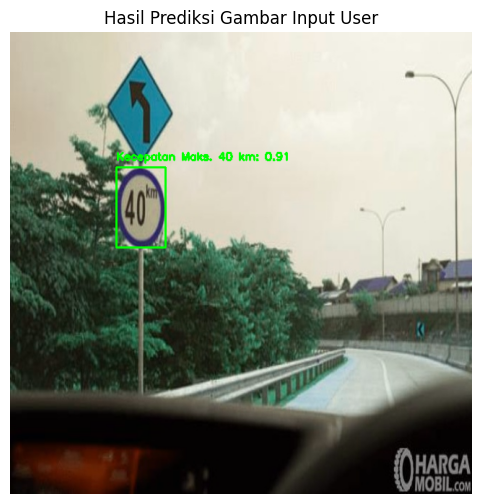

In [ ]:
#up gambar
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

# Buka gambar dengan PIL
image = Image.open(io.BytesIO(uploaded[img_name]))
image = np.array(image)

# Resize gambar ke 640x640
image_resized = cv2.resize(image, (640, 640))
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_RGB2BGR)

# Simpan gambar
temp_img_path = "temp_input.jpg"
cv2.imwrite(temp_img_path, image_resized)

# Prediksi
user_result = model2(temp_img_path)

image_with_boxes = predict_BoundingBox(temp_img_path, user_result[0])
image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.title("Hasil Prediksi Gambar Input User")
plt.show()

## Tahap 6: Deployment
Tahap deployment adalah tahap akhir di mana model yang telah dilatih dan dievaluasi diimplementasikan dalam lingkungan produksi agar dapat digunakan oleh pengguna akhir.

Dalam proyek ini, proses deployment melibatkan prediksi terhadap gambar baru, baik yang sudah ada dalam dataset atau gambar yang diunggah oleh pengguna. Proses ini mencakup prediksi dan visualisasi hasil deteksi.

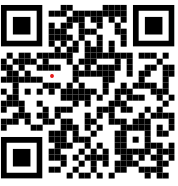